## Resources
- https://pycaret.org/
- https://colab.research.google.com/drive/1GqQ3XAIzg4krBbnOpKyeRqT0qBQhdwYL?usp=sharing
- https://towardsdatascience.com/build-and-deploy-your-first-machine-learning-web-app-e020db344a99

In [85]:
import pandas as pd
from pycaret.classification import *

titanic = pd.read_csv('data/train.csv')
test  = pd.read_csv('data/test.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
# create transformation pipeline
titanicSetup = setup(titanic, target = 'Survived', session_id = 123,
           normalize = True,
           polynomial_features = True,
           trigonometry_features = True,
           feature_interaction=True,
           bin_numeric_features= ['Age'],
           ignore_features=['Name', 'Ticket','PassengerId', 'Cabin'],
          categorical_features=['Embarked', 'Pclass'],
          numeric_features=['SibSp', 'Parch', 'Fare']
          )

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(891, 12)"
4,Missing Values,True
5,Numeric Features,5
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [87]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Gradient Boosting Classifier,0.831400,0.860400,0.719600,0.823800,0.764700,0.634700
1,Extreme Gradient Boosting,0.828200,0.859700,0.711100,0.819500,0.758200,0.626500
2,Light Gradient Boosting Machine,0.825000,0.855000,0.748900,0.789800,0.766500,0.626800
3,Ridge Classifier,0.818500,0.000000,0.661100,0.837900,0.733100,0.599600
4,Linear Discriminant Analysis,0.818500,0.841600,0.661100,0.837300,0.732800,0.599500
5,CatBoost Classifier,0.818500,0.854000,0.723600,0.794400,0.753300,0.610400
6,Ada Boost Classifier,0.815200,0.851200,0.715200,0.782900,0.744500,0.601100
7,Logistic Regression,0.802400,0.831100,0.673400,0.784100,0.720100,0.569700
8,Random Forest Classifier,0.799300,0.838100,0.685500,0.767300,0.720000,0.565200
9,Extra Trees Classifier,0.799300,0.837200,0.723600,0.756000,0.735300,0.574100


In [89]:
# Gradient Boosting Classifier is the most accurate model so we'll use this
gradient_boosting_model = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8413,0.8873,0.7917,0.7917,0.7917,0.6635
1,0.8254,0.8216,0.7500,0.7826,0.7660,0.6268
2,0.8571,0.9113,0.6667,0.9412,0.7805,0.6791
3,0.8710,0.8751,0.6957,0.9412,0.8000,0.7079
4,0.7097,0.7522,0.5000,0.6667,0.5714,0.3586
5,0.8548,0.8092,0.7500,0.8571,0.8000,0.6869
6,0.8710,0.8893,0.7500,0.9000,0.8182,0.7195
7,0.8548,0.8607,0.7917,0.8261,0.8085,0.6917
8,0.7903,0.8766,0.6667,0.7619,0.7111,0.5477
9,0.8387,0.9211,0.8333,0.7692,0.8000,0.6652


In [91]:
tuned_gradient_boosting_model = tune_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8254,0.8584,0.7500,0.7826,0.7660,0.6268
1,0.8254,0.8558,0.7500,0.7826,0.7660,0.6268
2,0.8571,0.9209,0.7500,0.8571,0.8000,0.6897
3,0.8065,0.8606,0.6522,0.7895,0.7143,0.5699
4,0.7903,0.7599,0.6667,0.7619,0.7111,0.5477
5,0.7903,0.8191,0.7083,0.7391,0.7234,0.5547
6,0.8548,0.9024,0.8333,0.8000,0.8163,0.6964
7,0.8226,0.8476,0.7500,0.7826,0.7660,0.6232
8,0.8226,0.8706,0.7500,0.7826,0.7660,0.6232
9,0.8387,0.9265,0.8333,0.7692,0.8000,0.6652


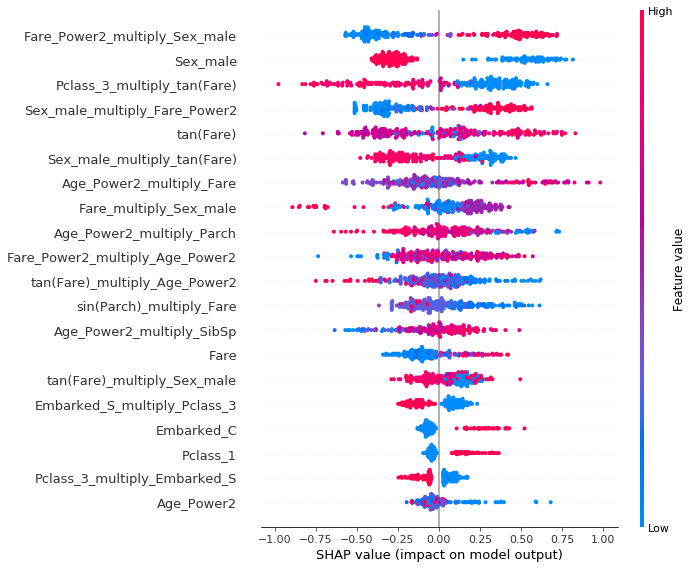

In [92]:
interpret_model(tuned_gradient_boosting_model, plot = 'summary')

In [93]:
predict_model(tuned_gradient_boosting_model);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Gradient Boosting Classifier,0.806,0.8584,0.7282,0.7576,0.7426,0.587


In [94]:
# Finalize Model: returns a model that has been trained on the entire dataset. 
titanic_radient_boost_final = finalize_model(tuned_gradient_boosting_model)

In [95]:
# Show the parameters used for final model
titanic_radient_boost_final.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.04,
 'loss': 'deviance',
 'max_depth': 70,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 115,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 123,
 'subsample': 0.15000000000000002,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [96]:
# make prediction with tuned model on full dataset
predict_model(titanic_radient_boost_final)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Gradient Boosting Classifier,0.8993,0.9662,0.8252,0.9043,0.8629,0.7836


,SibSp,Parch,Fare,Age_Power2,sin(Parch),Fare_Power2,tan(Fare),sin(SibSp),Pclass_1,Pclass_2,...,Fare_Power2_multiply_Sex_male,Age_Power2_multiply_Fare,Age_Power2_multiply_SibSp,Pclass_3_multiply_Embarked_S,Age_Power2_multiply_Parch,Sex_male_multiply_tan(Fare),Sex_male_multiply_Pclass_3,Survived,Label,Score
0,-0.474545,-0.473674,-0.386671,-0.169446,-0.490713,-0.192581,0.124392,-0.522320,0.0,1.0,...,-0.192581,0.065520,0.080410,0.0,0.080262,0.124392,0.0,0,0,0.1580
1,0.432793,-0.473674,0.395814,-0.189616,-0.490713,-0.047011,0.054107,1.516316,1.0,0.0,...,-0.000000,-0.075053,-0.082065,0.0,0.089816,0.000000,0.0,1,1,0.9772
2,3.154809,0.767630,-0.061999,-1.175566,1.743912,-0.153354,0.125625,-2.355830,0.0,0.0,...,-0.153354,0.072884,-3.708685,0.0,-0.902399,0.125625,1.0,0,0,0.1275
3,-0.474545,-0.473674,-0.486337,-0.189616,-0.490713,-0.198598,0.114377,-0.522320,0.0,0.0,...,-0.198598,0.092217,0.089981,1.0,0.089816,0.114377,1.0,0,0,0.0138
4,1.340132,-0.473674,0.831478,-0.684858,-0.490713,0.109635,0.128911,1.680639,0.0,1.0,...,0.109635,-0.569444,-0.917800,0.0,0.324399,0.128911,0.0,0,0,0.0475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,-0.474545,-0.473674,-0.486337,-0.030206,-0.490713,-0.198598,0.114377,-0.522320,0.0,0.0,...,-0.198598,0.014690,0.014334,1.0,0.014308,0.114377,1.0,1,0,0.1368
264,0.432793,2.008933,0.660333,-0.533266,1.924033,0.041650,0.120871,1.516316,0.0,1.0,...,0.000000,-0.352133,-0.230794,0.0,-1.071296,0.000000,0.0,1,1,0.8931
265,1.340132,-0.473674,-0.364355,0.707540,-0.490713,-0.190846,0.186623,1.680639,0.0,0.0,...,-0.190846,-0.257796,0.948197,1.0,-0.335143,0.186623,1.0,0,0,0.2115
266,1.340132,-0.473674,2.042579,1.627196,-0.490713,0.829194,0.109864,1.680639,1.0,0.0,...,0.829194,3.323677,2.180657,0.0,-0.770760,0.109864,0.0,1,1,0.5407


In [97]:
# save transformation pipeline and final model 
save_model(titanic_radient_boost_final, model_name = 'data/model_pycaret_pipeline')

Transformation Pipeline and Model Succesfully Saved


## Make predictions for submission

In [98]:
# generate predictions on unseen data
predictions = predict_model(titanic_radient_boost_final, data = test)

In [99]:
# The 'Label' and 'Score' columns are added onto the test set. 
# Label is the prediction and Score is the probability of the prediction.
predictions

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.0690
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.3049
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.1015
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.1456
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0.0858
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,0.0138
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0.9352
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0.0078
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,0.0138


In [100]:
submission = predictions[['PassengerId', 'Label']]

In [101]:
submission.columns = ['PassengerId', 'Survived']

In [102]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [103]:
# Create file for submission
submission.to_csv('data/submission_pycaret_pipeline.csv', index = False)